In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [61]:
ping_img = cv.imread("../original.png", cv.IMREAD_GRAYSCALE)
cfar1d_img = cv.imread("../cfar1d.png", cv.IMREAD_GRAYSCALE)
cfar2d_img = cv.imread("../cfar2d.png", cv.IMREAD_GRAYSCALE)

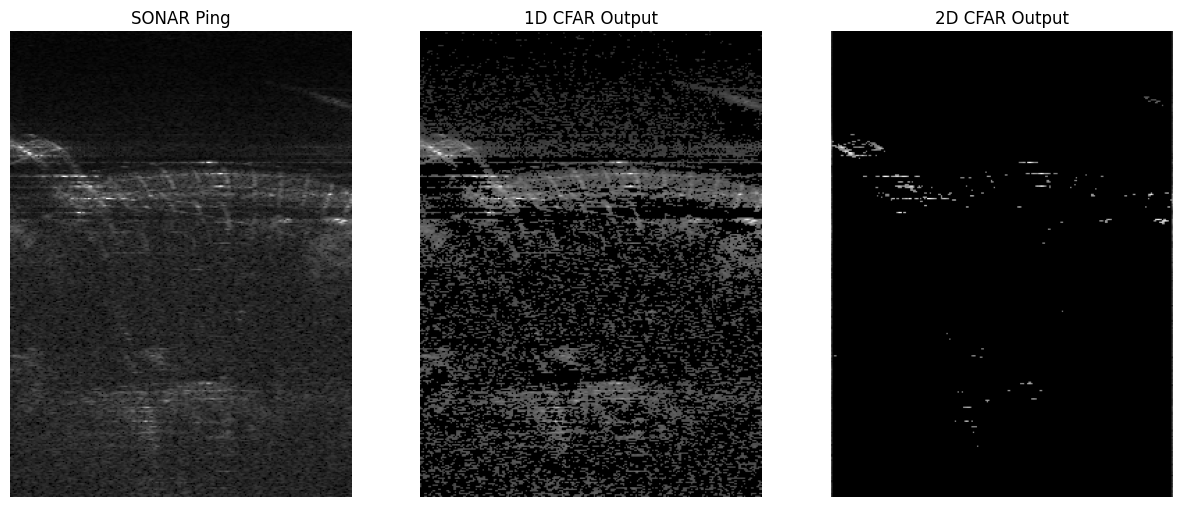

In [62]:
top, bottom, left, right = 30, 70, 5, 5
trimmed_ping_img = ping_img[top:-bottom, left:-right]
trimmed_cfar1d_img = cfar1d_img[top:-bottom, left:-right]
trimmed_cfar2d_img = cfar2d_img[top:-bottom, left:-right]

# ret, threshold_cfar1d_img = cv.threshold(trimmed_cfar1d_img, 127, 255, cv.THRESH_BINARY)
# ret, threshold_cfar2d_img = cv.threshold(trimmed_cfar2d_img, 127, 255, cv.THRESH_BINARY)


fig, axes = plt.subplots(1,3, figsize = (15,10))
axes[0].set_title("SONAR Ping")
axes[0].imshow(trimmed_ping_img, cmap = "gray")
axes[0].axis('off')
axes[1].set_title("1D CFAR Output")
axes[1].imshow(trimmed_cfar1d_img, cmap = "gray")
axes[1].axis('off')
axes[2].set_title("2D CFAR Output")
axes[2].imshow(trimmed_cfar2d_img, cmap = "gray")
axes[2].axis('off')

fig.savefig("detection_fig.png", bbox_inches="tight")

Text(0.5, 1.0, '2D CFAR Output')

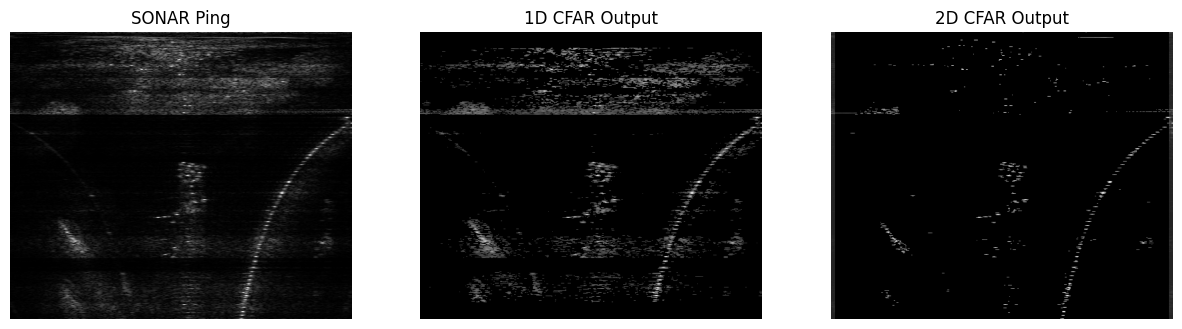

In [59]:
ping_img = cv.imread("./cfar_results_figure/original.png", cv.IMREAD_GRAYSCALE)
cfar1d_img = cv.imread("./cfar_results_figure/1d_image.png", cv.IMREAD_GRAYSCALE)
cfar2d_img = cv.imread("./cfar_results_figure/2d_image.png", cv.IMREAD_GRAYSCALE)
# ret, threshold_cfar1d_img = cv.threshold(cfar1d_img, 120, 255, cv.THRESH_BINARY)
# ret, threshold_cfar2d_img = cv.threshold(cfar2d_img, 120, 255, cv.THRESH_BINARY)
fig, axes = plt.subplots(1,3, figsize = (15,10))
axes[0].imshow(ping_img, cmap = "gray")
axes[0].axis("off")
axes[0].set_title("SONAR Ping")
axes[1].imshow(cfar1d_img, cmap = "gray")
axes[1].axis("off")
axes[1].set_title("1D CFAR Output")
axes[2].imshow(cfar2d_img, cmap = "gray")
axes[2].axis("off")
axes[2].set_title("2D CFAR Output")

# fig.savefig("parent_child_fig.png", bbox_inches="tight")


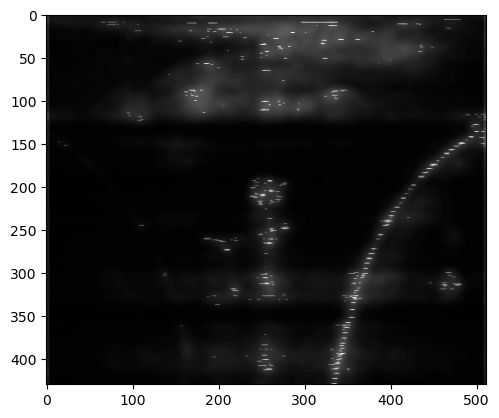

In [106]:
alpha = 0.7
beta = 1 - alpha

ping_img = cv.GaussianBlur(ping_img, (3,3), 0.0)
res = cv.addWeighted(ping_img, alpha, cfar_img, beta, 0.0)

plt.imshow(res, cmap='gray')
plt.axes = "off"
plt.savefig("weighted_parent_child_output.png", bbox_inches = "tight")


In [3]:
image_1d=cv.imread("../1d_image.png",0)
image_2d=cv.imread("../2d_image.png",0)
original=cv.imread("../original.png",0)

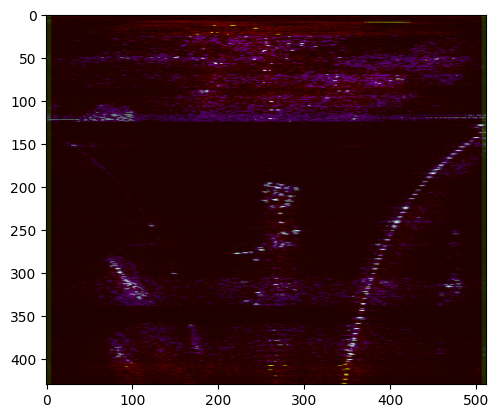

In [ ]:
combined=cv.merge([original,image_2d,image_1d])
plt.imshow(combined)

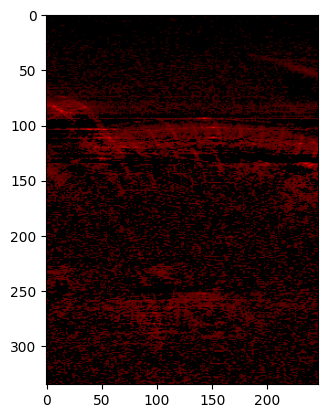

In [63]:
red_1d=cv.merge([(trimmed_cfar1d_img),np.zeros_like(trimmed_cfar1d_img),np.zeros_like(trimmed_cfar1d_img)])
plt.imshow(red_1d)

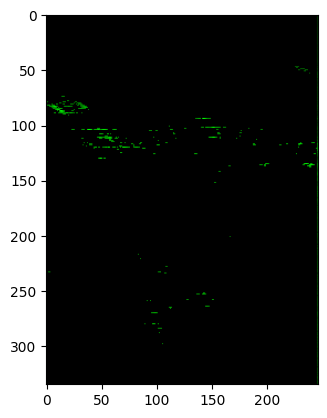

In [64]:
green_2d=cv.merge([np.zeros_like(trimmed_cfar1d_img),trimmed_cfar2d_img,np.zeros_like(trimmed_cfar1d_img)])
plt.imshow(green_2d)

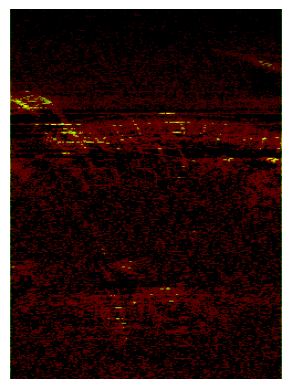

In [65]:
weighted=cv.addWeighted(green_2d,1.2,red_1d,0.95,0)
plt.axis("off")
plt.imshow(weighted)

plt.savefig("weighted_output.png", bbox_inches = "tight")


In [ ]:
threshold1d = cv.imread("threshold1d.png",0)
threshold2d = cv.imread("threshold2d.png",0)

x = []
original_line = []
threshold1d_line = []
threshold2d_line = []

flattenOrigin = original.ravel()
flatten1d = threshold1d.ravel()
flatten2d = threshold2d.ravel()
x = [i for i in range(len(flatten1d))]

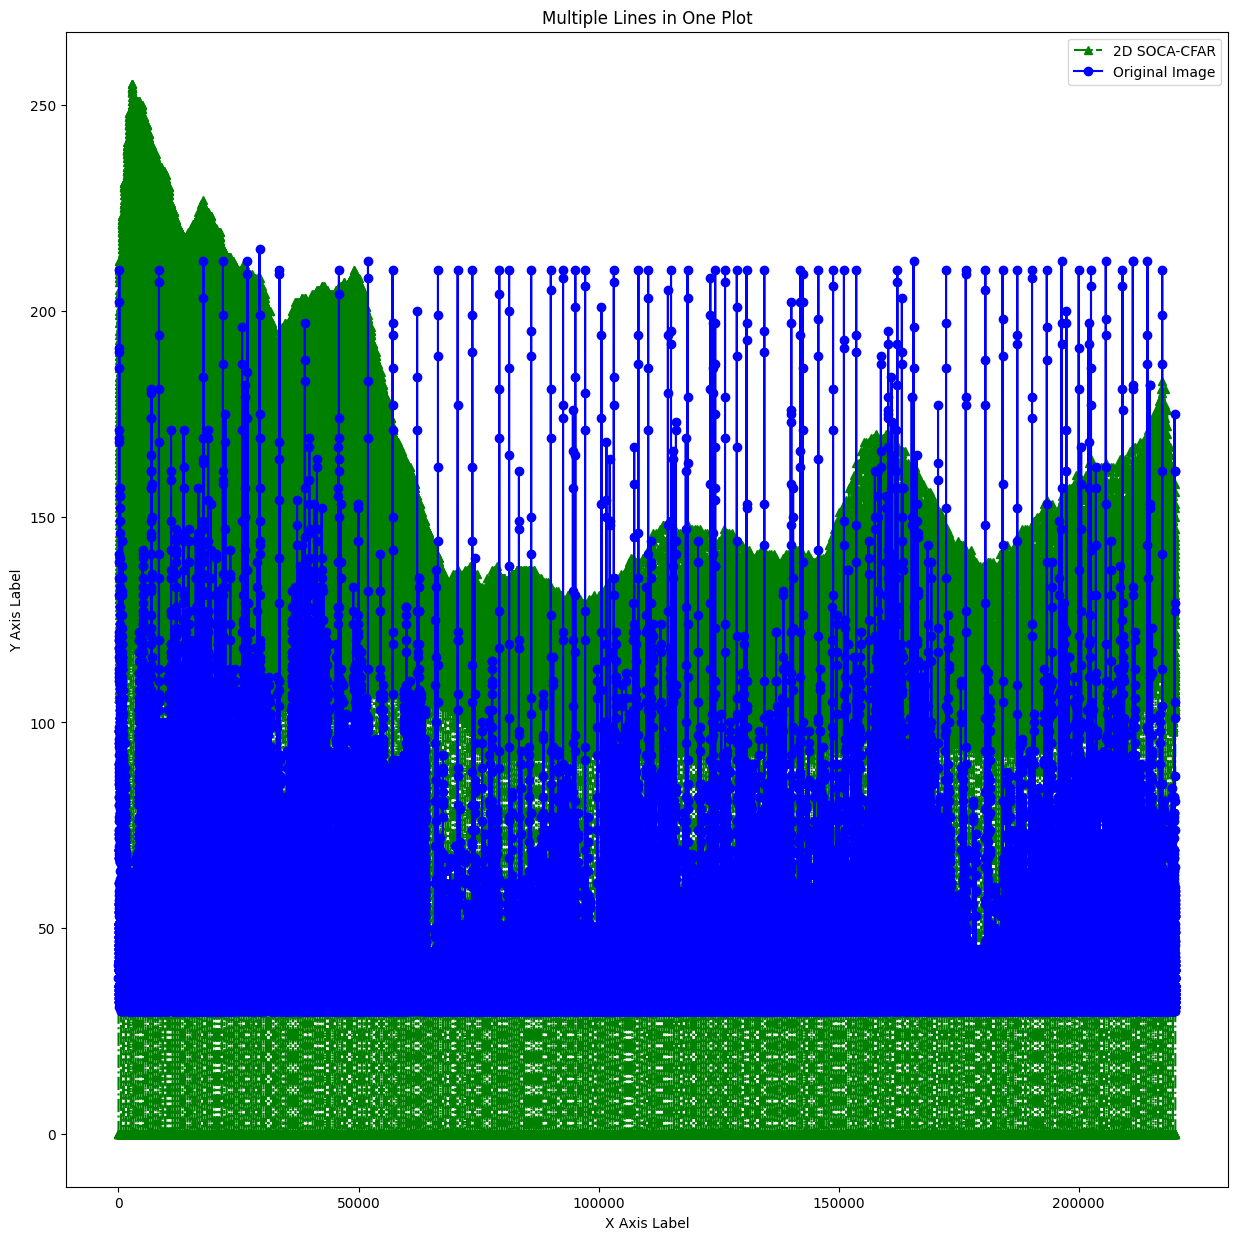

In [56]:
plt.figure(figsize=(15,15))
plt.plot(x, flatten2d, marker='^', linestyle='-.', color='g', label="2D SOCA-CFAR")
# plt.plot(x, flatten1d, marker='s', linestyle='--', color='r', label="1D SOCA-CFAR")
plt.plot(x, flattenOrigin, marker='o', linestyle='-', color='b', label="Original Image")

# Labels and title
plt.xlabel("X Axis Label")
plt.ylabel("Y Axis Label")
plt.title("Multiple Lines in One Plot")

# Show legend
plt.legend()

# Display the plot
plt.show()